# 머신러닝과 딥러닝을 활용한 비트코인 가격예측 데이터분석 보고서


### 요약
비트코인은 가상화폐 시장에서 중요한 역할을 하는 암호화폐입니다. 비트코인의 가격 예측은 투자자와 거래자에게 큰 관심을 받으며, 이를 위해 머신러닝과 딥러닝 모델을 활용한 분석이 진행되고 있습니다. 본 보고서에서는 단순 회귀 분석부터 복잡한 딥러닝 모델까지 다양한 방법을 사용하여 비트코인 가격 예측을 수행하고, 그 결과와 고려사항에 대해 제시합니다.

### 목차
1. [데이터 수집](##1-데이터-수집)
2. [데이터 전처리](##2-데이터-전처리)
3. [탐색적 데이터 분석(EDA)](##3-탐색적-데이터-분석eda)
4. [모델 선택](##4-모델-선택)
5. [모델 평가](##5-모델-평가)
6. [결과 및 토의](##6-결과-및-토의)
7. [참고문헌](##7-참고문헌)
8. [결론](##8-결론)

1. 제목 및 요약
2. 서론
    - 연구의 목적과 배경 설명
    - 데이터 셋 설명
3. 데이터 수집 및 전처리
    - 사용된 데이터셋의 출처와 설명
    - 데이터의 특성과 구성요소에 대한 설명
    - 결측치, 이상치, 중복 등의 데이터 처리 방법 설명
    - 데이터 시각화를 통한 초기 EDA 결과
4. 분석
    - 특성 공학
        - 사용된 특성 및 변수 설명
        - 특성 선택 또는 추출 방법 설명
        - 특성 간 상관관계 분석 결과 제시
    - 모델 선택 및 구축
        - 사용된 머신러닝/딥러닝 알고리즘 설명
        - 선택 과정에 대한 이유
        - 모델 구조 및 파라미터 설정 설명
    - 학습 및 평가
        - 학습 데이터와 테스트 데이터 분할 방법 설명
        - 학습 및 평가 지표(r제곱, mse...)
        - 모델 학습 및 평가 결과
        - 성능 평가 및 개선점
5. 결과 및 토의
    - 예측 결과과 실제 값의 비교를 통한 모델 성능 평가
    - 모델의 장단점 및 개선 가능성 토의
    - 예측결과에 대한 해석 및 인사이트 도출
6. 결론
    - 연구 결과 요약, 결론
    - 모델 활용 가능성 및 미래 연구 방향 제시
7. 참고
8. 부록

비트코인은 시계열 데이터 중에서도 변동성이 심한 

## [1. 데이터 수집](###목차)

##### S&P500 데이터 수집
- **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

In [1]:
from pandas_datareader import data as pdr
import yfinance as yfin

> [pandas-datareader 공식 문서](https://pandas-datareader.readthedocs.io/en/latest/index.html)

In [5]:
from datetime import date, datetime

today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = datetime(2013,1,1)

In [9]:
# S&P500
yfin.pdr_override()

snp500name = 'S&P500'
snp500 = '^GSPC'
snp500_df = pdr.get_data_yahoo(snp500, start=date_start, end=date_today)

print(snp500_df.shape)
snp500_df.head()

[*********************100%***********************]  1 of 1 completed
(2614, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,1462.420044,4202600000
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,1459.369995,3829730000
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,1466.469971,3424290000
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,1461.890015,3304970000
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,1457.150024,3601600000


##### 비트코인 데이터 수집
- **수집기간:** ***2014년 9월 17일부터*** 2023년 5월 1일까지
- **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

In [21]:
# BTC(KRW)
yfin.pdr_override()

btc_krwname = 'Bitcoin(KRW)'
btc_krw = 'BTC-KRW'
btc_krw_df = pdr.get_data_yahoo(btc_krw, start=date_start, end=date_today)

print(btc_krw_df.shape)
btc_krw_df.head()

[*********************100%***********************]  1 of 1 completed
(3168, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355


In [22]:
# BTC(USD)
yfin.pdr_override()

btc_usdname = 'Bitcoin(USD)'
btc_usd = 'BTC-USD'
btc_usd_df = pdr.get_data_yahoo(btc_usd, start=date_start, end=date_today)

print(btc_usd_df.shape)
btc_usd_df.head()

[*********************100%***********************]  1 of 1 completed
(3168, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [30]:
btc_usd_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-16,27171.513672,27299.304688,26878.947266,27036.650391,27036.650391,12732238816
2023-05-17,27035.470703,27465.927734,26600.144531,27398.802734,27398.802734,15140006925
2023-05-18,27401.650391,27466.527344,26415.101562,26832.208984,26832.208984,15222938600
2023-05-19,26826.753906,27128.619141,26700.210938,26890.128906,26890.128906,11258983301
2023-05-20,26888.841797,27155.158203,26843.277344,27129.585938,27129.585938,7044911360


##### 외부요인 데이터 수집

1. 미국 국채 10년물 수익률(Treasury Yield 10 Years)
    - **수집기간:** 2013년 1월 1일부터 2023년 5월 1일까지(토요일, 일요일, 공휴일 제외)
    - **데이터 항목:** 날짜(Date, 인덱스), 가격(Open, High, Low, Close, Adj Close), 거래량(Volume)

---
2. *더 정교한 모델 생성을 위한 외부요인 데이터 수집은 [4. 모델선택](#4-모델-선택) 과정에서 수행합니다.*

In [11]:
# 미국 국채 10년물 수익률
yfin.pdr_override()

tnxname = 'Treasury Yield 10 Years'
tnx = '^TNX'
tnx_df = pdr.get_data_yahoo(tnx, start=date_start, end=date_today)

print(tnx_df.shape)
tnx_df.head(5)

[*********************100%***********************]  1 of 1 completed
(2612, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,1.842,1.860,1.825,1.839,1.839,0
2013-01-03,1.844,1.911,1.835,1.899,1.899,0
2013-01-04,1.952,1.965,1.911,1.915,1.915,0
2013-01-07,1.904,1.917,1.892,1.903,1.903,0
2013-01-08,1.894,1.894,1.864,1.871,1.871,0


### 수집 데이터 확인: 개괄적으로

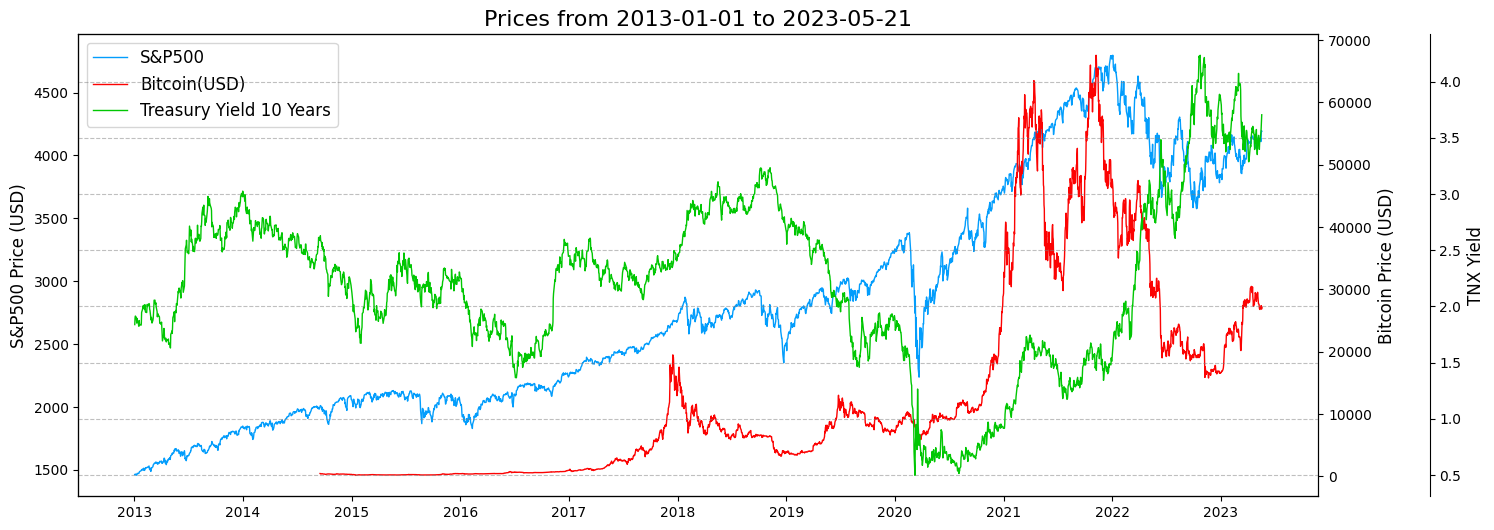

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

pd.plotting.register_matplotlib_converters()
years = mdates.YearLocator()
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.xaxis.set_major_locator(years)

# 첫 번째 데이터프레임 플로팅
x1 = snp500_df.index
y1 = snp500_df['Adj Close']
# ax1.fill_between(x1, 0, y1, color='#b9e1fa')
ax1.plot(y1, color='#039dfc', label=snp500name, linewidth=1.0)

# 두 번째 데이터프레임 플로팅
ax2 = ax1.twinx() # 보조 축 추가
x2 = btc_usd_df.index
y2 = btc_usd_df['Adj Close']
# ax2.fill_between(x2, 0, y2, color='#f8c9cb')
ax2.plot(y2, color='#fc0303', label=btc_usdname, linewidth=1.0)

# 세 번째 데이터프레임 플로팅
ax3 = ax1.twinx()  # 보조 축 추가
ax3.spines['right'].set_position(('outward', 80))  # 세 번째 데이터프레임의 축 위치 조정
x3 = tnx_df.index
y3 = tnx_df['Adj Close']
# ax3.fill_between(x3, 0, y3, color='#d7f8c9')
ax3.plot(y3, color='#01c703', label=tnxname, linewidth=1.0)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax2.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left', fontsize=12, frameon=True, facecolor='white')

ax1.set_ylabel('S&P500 Price (USD)', fontsize=12)
ax2.set_ylabel('Bitcoin Price (USD)', fontsize=12)
ax3.set_ylabel('TNX Yield', fontsize=12)

plt.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
plt.title('Prices from 2013-01-01 to 2023-05-21', fontsize=16)
plt.show()


#### 추세선(Trend)

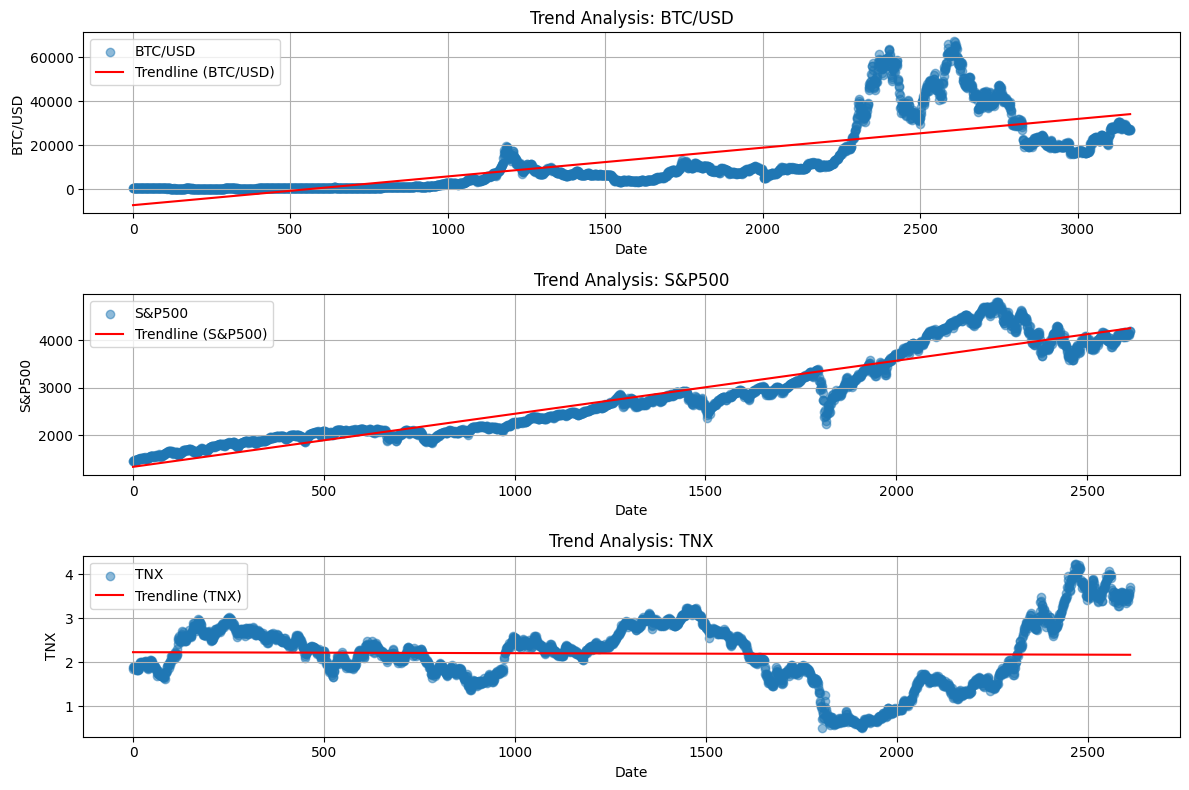

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

# 선형 회귀 분석을 위해 날짜를 숫자형으로 변환
x = np.arange(len(btc_usd_df.index)).reshape(-1, 1)

# 서브플롯 설정
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# BTC/USD 추세 시각화
axs[0].scatter(x, btc_usd_df['Adj Close'], label='BTC/USD', alpha=0.5)
model = LinearRegression()
model.fit(x, btc_usd_df['Adj Close'])
y_pred = model.predict(x)
axs[0].plot(x, y_pred, color='red', label='Trendline (BTC/USD)')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('BTC/USD')
axs[0].set_title('Trend Analysis: BTC/USD')
axs[0].legend()
axs[0].grid(True)

# S&P500 추세 시각화
x = np.arange(len(snp500_df.index)).reshape(-1, 1)
axs[1].scatter(x, snp500_df['Adj Close'], label='S&P500', alpha=0.5)
model = LinearRegression()
model.fit(x, snp500_df['Adj Close'])
y_pred = model.predict(x)
axs[1].plot(x, y_pred, color='red', label='Trendline (S&P500)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('S&P500')
axs[1].set_title('Trend Analysis: S&P500')
axs[1].legend()
axs[1].grid(True)

# TNX 추세 시각화
x = np.arange(len(tnx_df.index)).reshape(-1, 1)
axs[2].scatter(x, tnx_df['Adj Close'], label='TNX', alpha=0.5)
model = LinearRegression()
model.fit(x, tnx_df['Adj Close'])
y_pred = model.predict(x)
axs[2].plot(x, y_pred, color='red', label='Trendline (TNX)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('TNX')
axs[2].set_title('Trend Analysis: TNX')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


#### 계절성 박스플롯(Seasonality Boxplot)
- Box: 데이터의 25번째 백분위수(1사분위수, Q1)부터 75번째 백분위수(3사분위수, Q3)까지를 나타내는 박스(수평선은 중앙 값)
- 수염(Whiskers): 박스의 위와 아래에 있는 선분. 데이터의 전체 범위를 표현
- 이상치(Outliers): 수염범위를 벗어나는 개별 데이터 포인트

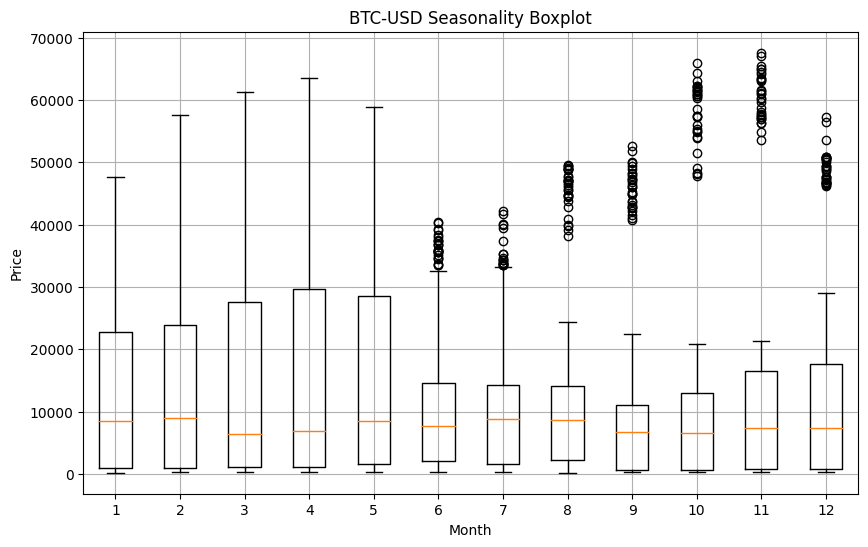

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_usd_df['Month'] = btc_usd_df.index.month  # 또는 btc_usd_df['Quarter'] = btc_usd_df.index.quarter

# 월별 또는 분기별 그룹화
grouped = btc_usd_df.groupby('Month')['Adj Close']

# 계절성 boxplot 그리기
fig, ax = plt.subplots(figsize=(10, 6))
data = [grouped.get_group(month) for month in grouped.groups]
ax.boxplot(data, labels=grouped.groups.keys())
ax.set_xlabel('Month')  # 또는 ax.set_xlabel('Quarter')
ax.set_ylabel('Price')
ax.set_title('BTC-USD Seasonality Boxplot')
plt.grid(True)
plt.show()

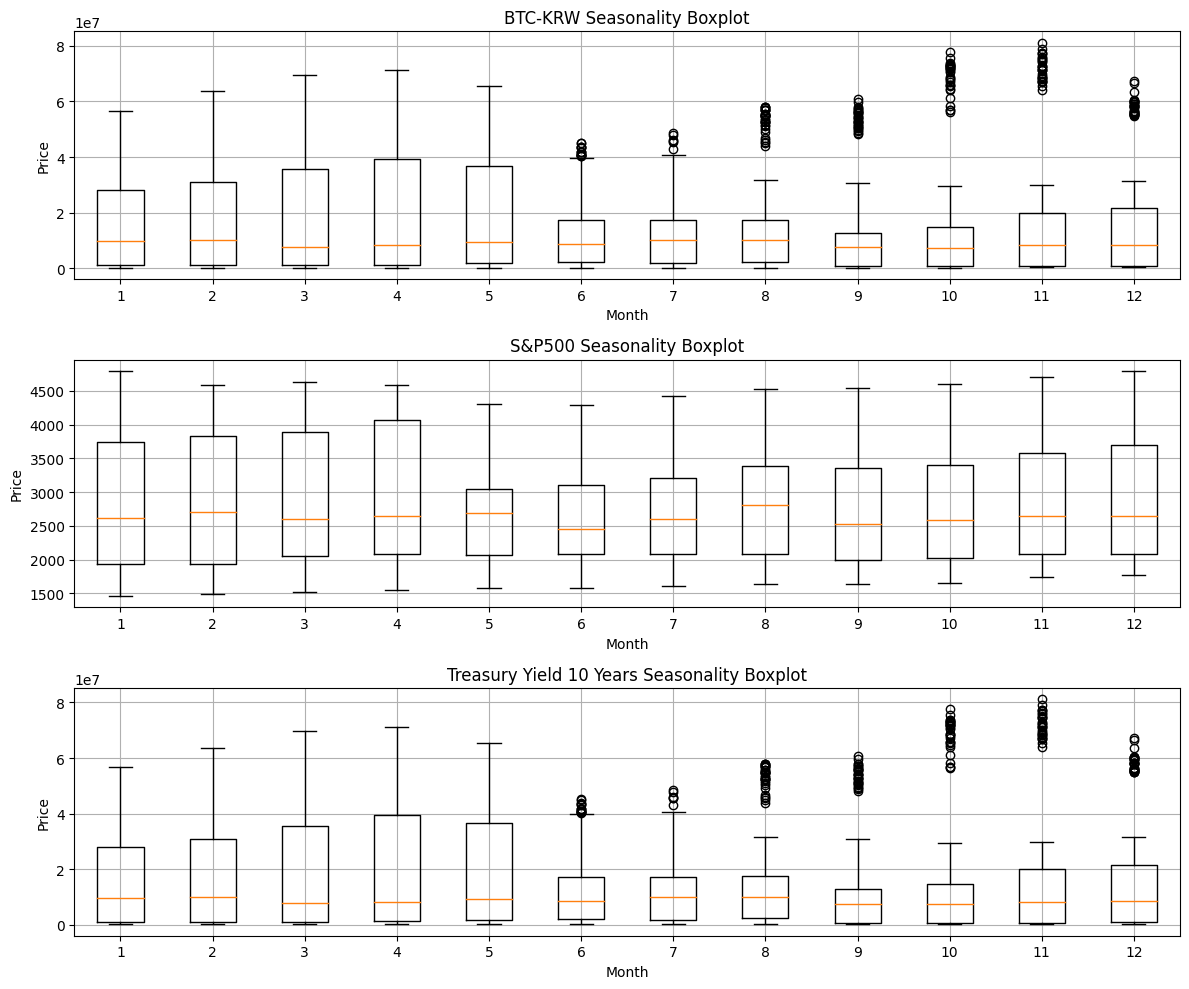

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임에서 월 또는 분기 정보 추출
btc_krw_df['Month'] = btc_krw_df.index.month
snp500_df['Month'] = snp500_df.index.month
tnx_df['Month'] = tnx_df.index.month

# 월별 또는 분기별 그룹화
grouped1 = btc_krw_df.groupby('Month')['Adj Close']
grouped2 = snp500_df.groupby('Month')['Adj Close']
grouped3 = tnx_df.groupby('Month')['Adj Close']

fig, axs = plt.subplots(3, 1, figsize=(12, 10))

data1 = [grouped1.get_group(month) for month in grouped1.groups]
data2 = [grouped2.get_group(month) for month in grouped2.groups]
data3 = [grouped3.get_group(month) for month in grouped3.groups]

axs[0].boxplot(data1, labels=grouped1.groups.keys())
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Price')
axs[0].set_title('BTC-KRW Seasonality Boxplot')
axs[0].grid(True)

axs[1].boxplot(data2, labels=grouped2.groups.keys())
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Price')
axs[1].set_title('S&P500 Seasonality Boxplot')
axs[1].grid(True)

axs[2].boxplot(data1, labels=grouped1.groups.keys())
axs[2].set_xlabel('Month')
axs[2].set_ylabel('Price')
axs[2].set_title('Treasury Yield 10 Years Seasonality Boxplot')
axs[2].grid(True)

plt.tight_layout()
plt.show()

#### 상관관계 히트맵

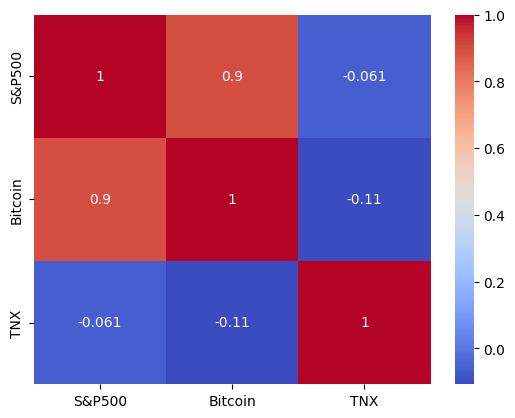

In [46]:
import seaborn as sns
# 세 데이터프레임을 하나의 데이터프레임으로 병합
merged_df = pd.concat([snp500_df['Adj Close'], btc_usd_df['Adj Close'], tnx_df['Adj Close']], axis=1)
merged_df.columns = ['S&P500', 'Bitcoin', 'TNX']

# 상관관계 행렬 생성
correlation_matrix = merged_df.corr()

# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### 수집 데이터 확인: BTC

In [69]:
btc_krw_df.head()

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2014-09-17,482611.81250,483811.03125,468121.03125,473203.50000,473203.50000,21787470960,9
2014-09-18,472713.03125,476276.53125,430991.40625,442818.25000,442818.25000,35976322560,9
2014-09-19,442466.65625,447515.40625,401278.37500,411989.34375,411989.34375,39571102935,9
2014-09-20,411861.00000,441730.53125,406862.40625,426711.75000,426711.75000,38469009780,9
2014-09-21,425857.09375,430387.15625,410304.03125,416189.65625,416189.65625,27737663355,9


## [2. 데이터 전처리](###목차)

## [3. 탐색적 데이터 분석(EDA)](###목차)


## [4. 모델 선택](###목차)
### 1.단순 회귀 분석 모델
### 2.로지스틱 회귀 분석 모델
### 3.다향 회귀 분석 모델
### 4.LSTM 모델
### 5.CNN(Conv1D)+LSTM 모델
### 6.CNN(Conv2D)+LSTM 모델

## [5. 모델 평가](###목차)
## [6. 결과 및 토의](###목차)
## [7. 참고문헌](###목차)
## [8. 결론](###목차)